In [1]:
# import all libraries and dependencies for clustering
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

#### We observe that for many columns which have values as Select. Which indicates the customers have not selected any value for that column. Its as good as null value.

Hence we convert these values to NaN

In [4]:
data.replace('Select',np.nan, inplace=True)

In [5]:
#Check the % of missing values for each variable
round(100*(data.isnull().sum()/9240),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
#Remove the columns which have missing values more than 40%
drop_cols = data.columns[100*(data.isnull().sum()/9240) >40.0]
data = data.drop(drop_cols, axis=1)

In [7]:
round(100*(data.isnull().sum()/9240),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Now we will look at each column which have missing values

#### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

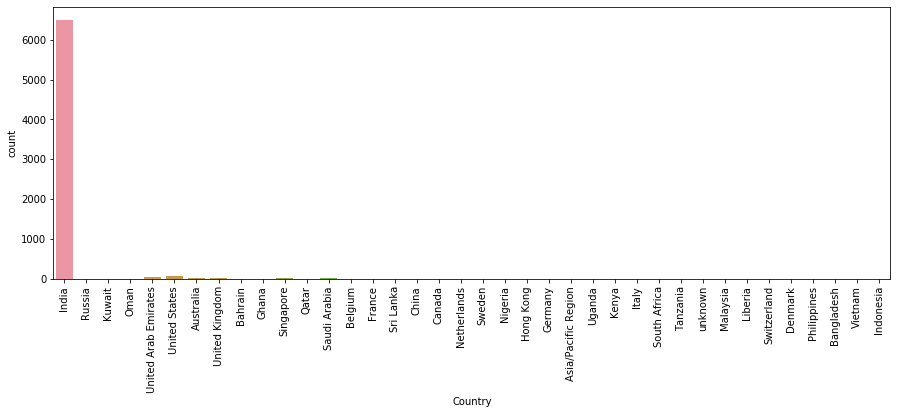

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(data.Country)
plt.xticks(rotation=90)

In [9]:
data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [10]:
#In this column we can impute the missing values by India
data.Country.fillna('India', inplace=True)
data.Country.isnull().sum()

0

#### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

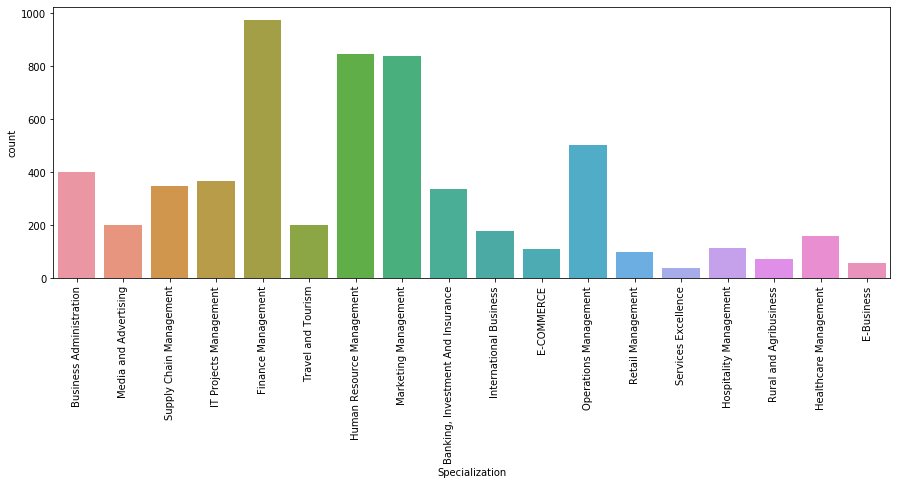

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(data.Specialization)
plt.xticks(rotation=90)

In [12]:
# For this column we can replace the Select and missing values with a new category called 'Others'
#data.Specialization.replace('Select','Others', inplace = True)
data.Specialization.fillna('Others', inplace=True)
data.Specialization.isnull().sum()

0

#### What is your current occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

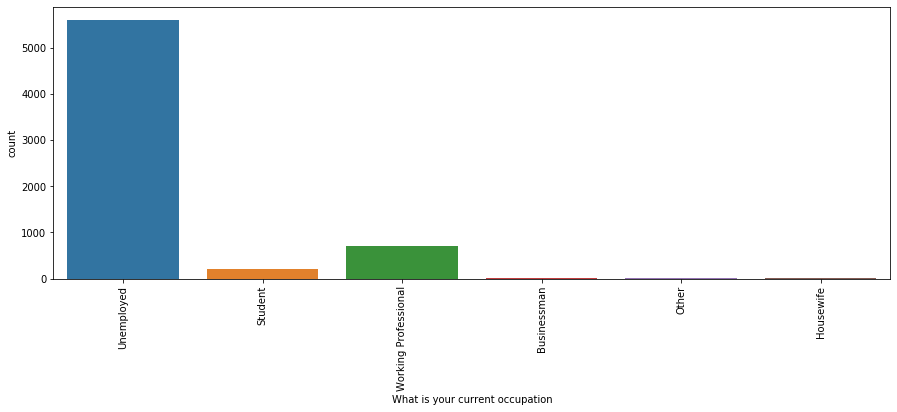

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data['What is your current occupation'])
plt.xticks(rotation=90)

In [14]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [15]:
# For this column we can impute the missing values with the mode which is 'Unemployed'
data['What is your current occupation'].fillna('Unemployed', inplace=True)
data['What is your current occupation'].isnull().sum()

0

#### What matters most to you in choosing a course

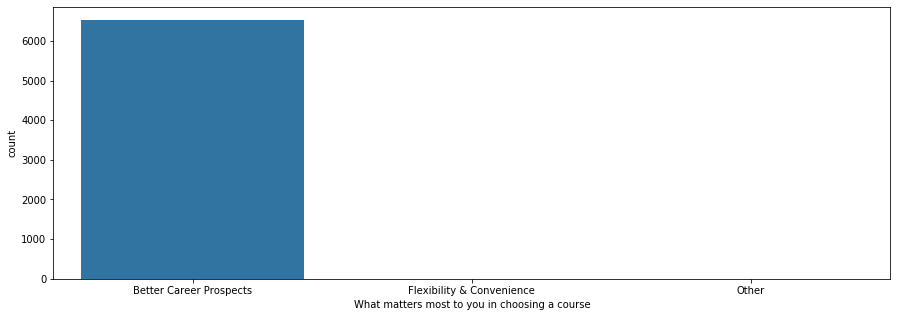

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data['What matters most to you in choosing a course'])
#plt.xticks(rotation = 90)

In [17]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

Since this column is highly skewed its better to drop the columns

In [18]:
data = data.drop('What matters most to you in choosing a course', axis=1)

#### Tags

In [19]:
data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

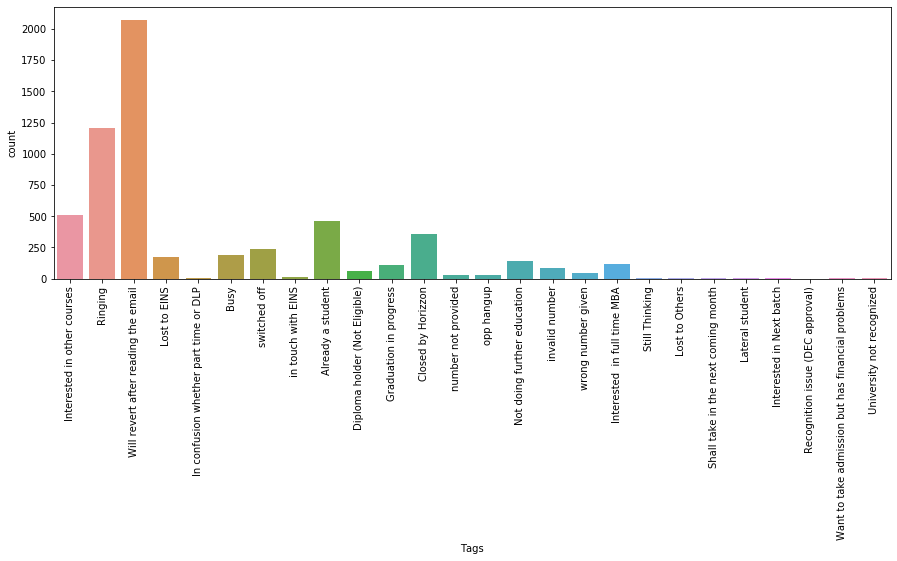

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(data.Tags)
plt.xticks(rotation = 90)

In [21]:
#We can impute the the missing values with the mode, which in this case is 'Will revert after reading the email'
data['Tags'].fillna(data.Tags.mode()[0], inplace=True)
data.Tags.isnull().sum()

0

#### City

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

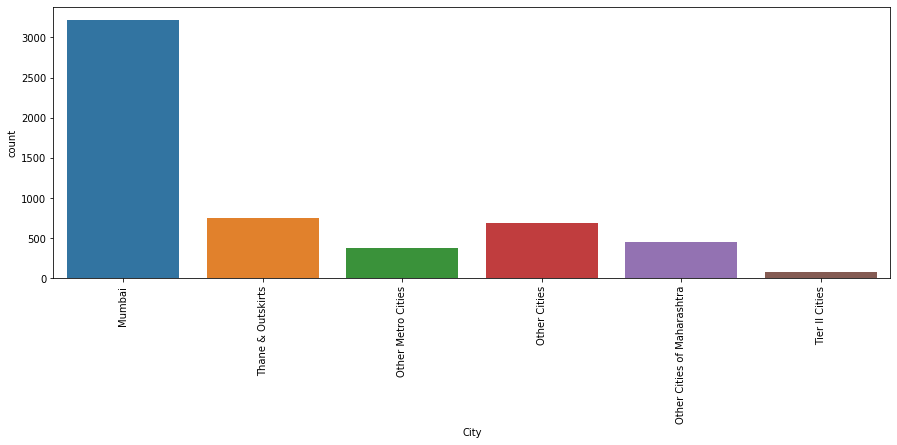

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data.City)
plt.xticks(rotation = 90)

In [23]:
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

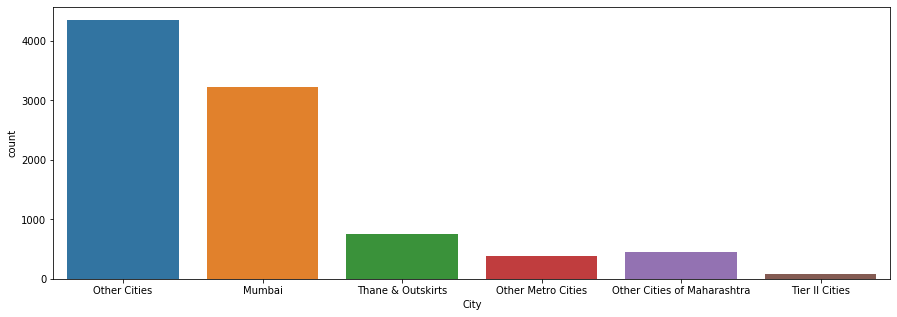

In [24]:
#For this column both the null and Select values can be imputed with the value Other Cities.
data.City.fillna('Other Cities', inplace=True)
plt.figure(figsize=(15,5))
sns.countplot(data.City)

#### For below columns there are less than 2% missing values. So its better to drop the rows with missing values
        1. Lead Source
        2. TotalVisits
        3. Page Views Per Visit
        4. Last Activity

In [25]:
data.dropna(inplace=True)

In [26]:
data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

#### Lets check how many Leads have been converted as per data. In other words whats the ratio of Leads getting converted.

In [27]:
100*(sum(data.Converted)/len(data))

37.85541106458012

We can see that the conversion rate is less than 38%, which is very low.

## Univariate Analysis

#### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

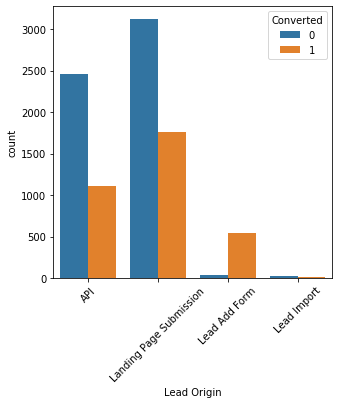

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(data['Lead Origin'], hue = data.Converted, data=data)
plt.xticks(rotation=45)

From the above plot we can tell that:
        1. Most of the leads are generated from API and Landing Page Submission but they have very less conversion rate.
        2. We have less number of leads from Lead Add Form but the conversion rate is very high.
        3. Leads generated from Lead Import is very less.

#### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

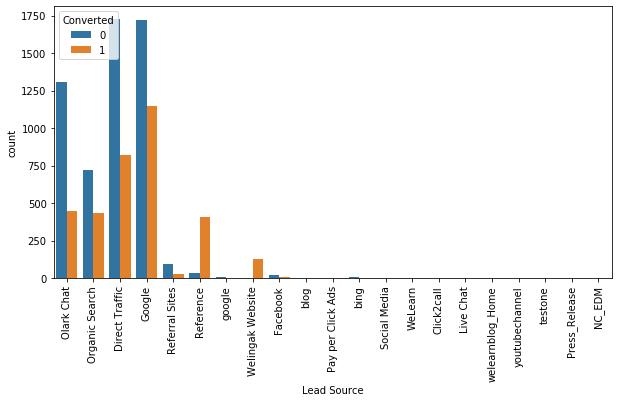

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data['Lead Source'], hue = data.Converted, data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

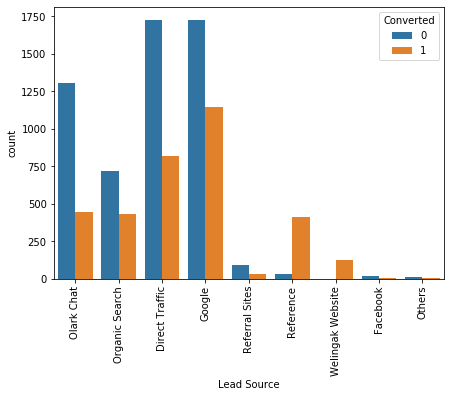

In [30]:
# Lets combine the values of Google and rest all small values in one category as Others
data['Lead Source'].replace('google', 'Google', inplace=True)
data['Lead Source'].replace(['NC_EDM','Press_Release', 'testone', 'youtubechannel', 'welearnblog_Home', 'Live Chat',
                             'Click2call','WeLearn','Social Media','bing','Pay per Click Ads','blog'], 'Others', inplace=True)
plt.figure(figsize=(7,5))
sns.countplot(data['Lead Source'], hue = data.Converted, data=data)
plt.xticks(rotation=90)

From the above plot we can find out the below:
        1. Leads generated from Google and Direct Traffic are high but the conversion rate is not that great.
        2. Leads generated from Reference and Welingak Website is not that great but conversion rate is very high.

#### Do Not Email & Do Not Call

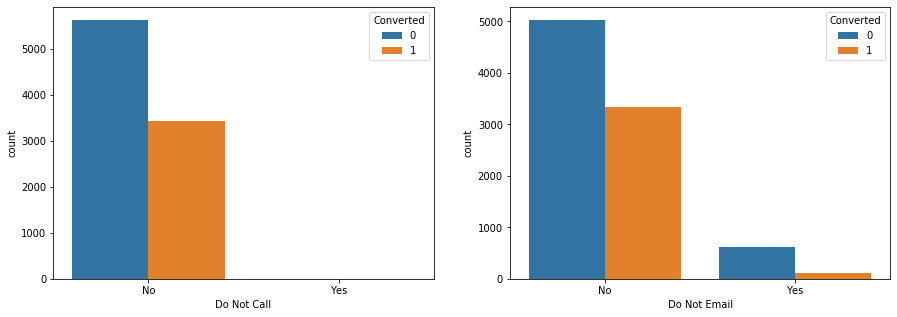

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data['Do Not Call'], hue = data.Converted, data=data)
plt.subplot(1,2,2)
sns.countplot(data['Do Not Email'], hue = data.Converted, data=data)

#### Total Visits

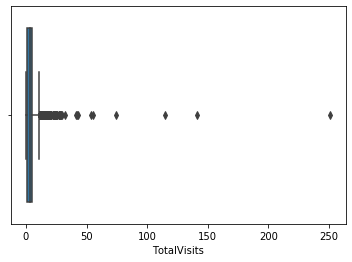

In [32]:
sns.boxplot(data.TotalVisits)

From the above plot we can clearly see that there are a large number of outliers. Hence we cap them between 0.05 and 0.95 percentile.

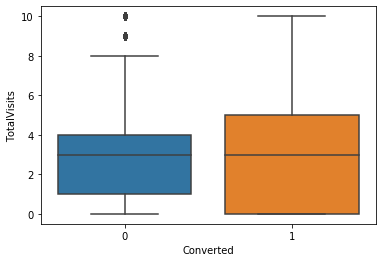

In [33]:
Q1 = data.TotalVisits.quantile(0.05)
Q4 = data.TotalVisits.quantile(0.95)
data['TotalVisits'][data['TotalVisits'] <= Q1] = Q1
data['TotalVisits'][data['TotalVisits'] >= Q4] = Q4

sns.boxplot(x = data.Converted, y= data.TotalVisits )

#### Total Time Spent On Website

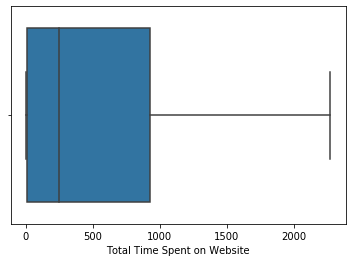

In [34]:
sns.boxplot(data['Total Time Spent on Website'])

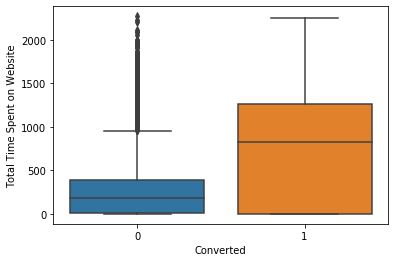

In [35]:
sns.boxplot(x = data.Converted, y= data['Total Time Spent on Website'])

We can see that the customers/leads spending more time on website are more likely to take a course.

#### Page Views per Visit

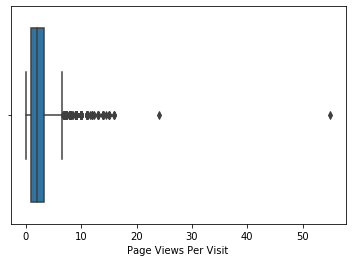

In [36]:
sns.boxplot(data['Page Views Per Visit'])

From the above plot we can clearly see that there are a large number of outliers. Hence we cap them between 0.05 and 0.95 percentile.

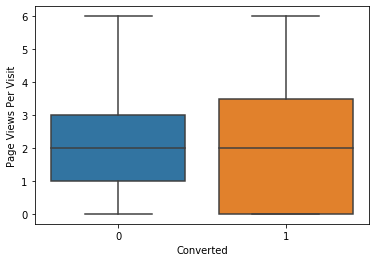

In [37]:
Q1 = data['Page Views Per Visit'].quantile(0.05)
Q4 = data['Page Views Per Visit'].quantile(0.95)
data['Page Views Per Visit'][data['Page Views Per Visit'] <= Q1] = Q1
data['Page Views Per Visit'][data['Page Views Per Visit'] >= Q4] = Q4

sns.boxplot(x = data.Converted, y= data['Page Views Per Visit'] )

#### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

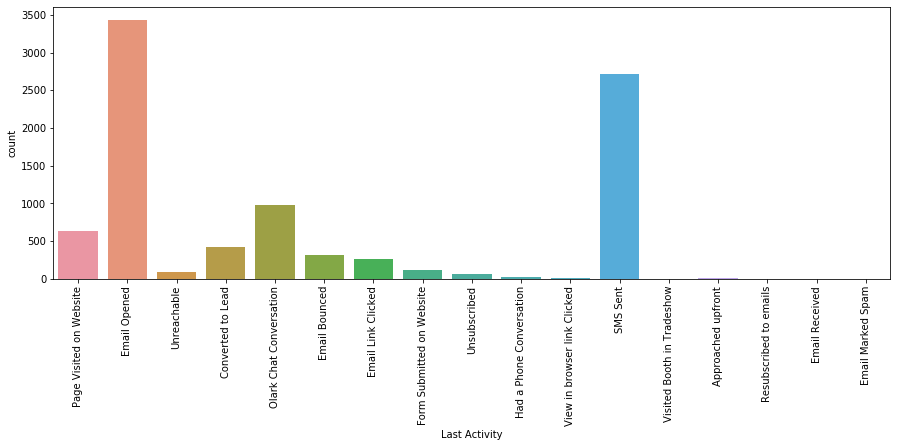

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(data['Last Activity'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

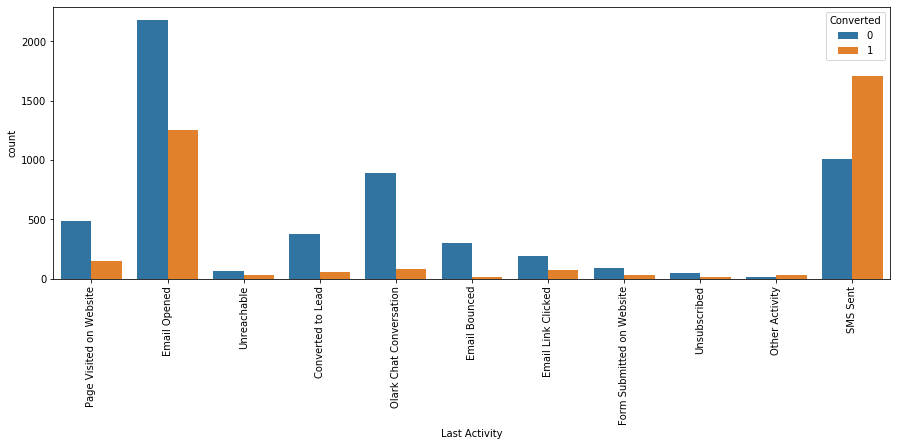

In [39]:
#Lets group all the smaller count values into Other Activity
data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow',
                               'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                              'Other Activity', inplace=True)
plt.figure(figsize=(15,5))
sns.countplot(data['Last Activity'], hue=data.Converted, data=data)
plt.xticks(rotation=90)

We can see that large number of Leads have the Last Acitivity as Email Opened and SMS Sent but only SMS Sent has the high conversion rate.

#### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

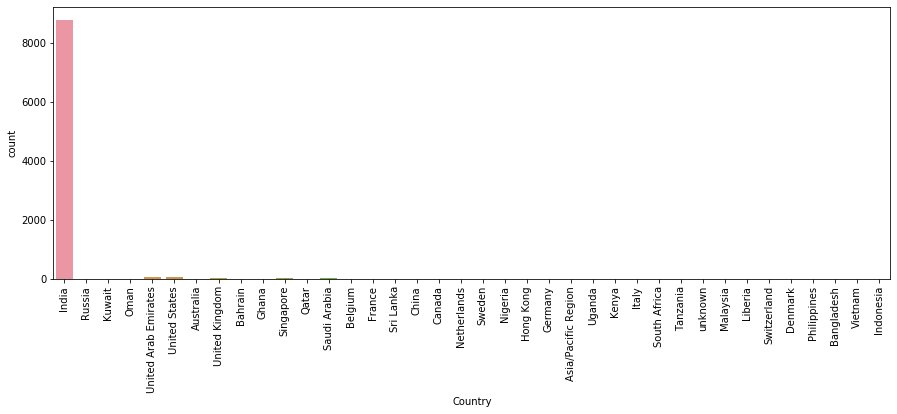

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(data.Country)
plt.xticks(rotation=90)

As we can see that the column is highly skewed, its better to drop this column

#### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

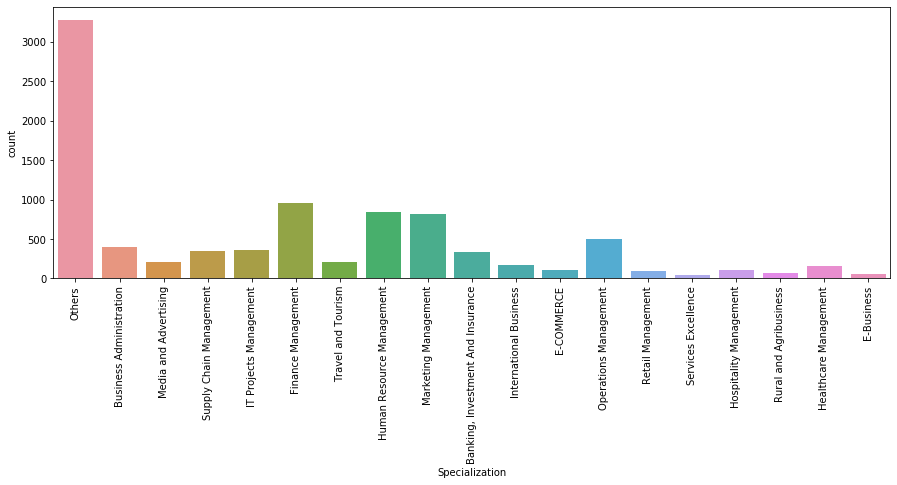

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(data.Specialization)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

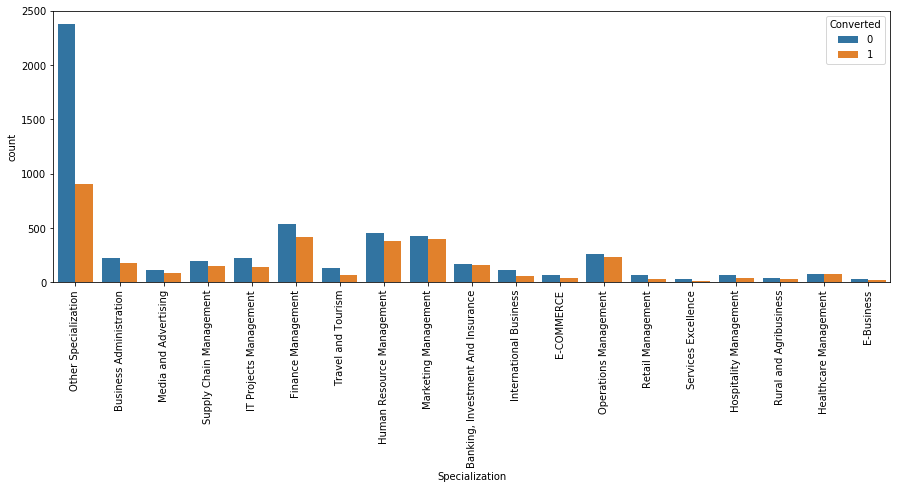

In [42]:
data.Specialization.replace('Others', 'Other Specialization', inplace=True)
plt.figure(figsize=(15,5))
sns.countplot(data.Specialization, hue=data.Converted, data=data)
plt.xticks(rotation=90)

#### What is your current Occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

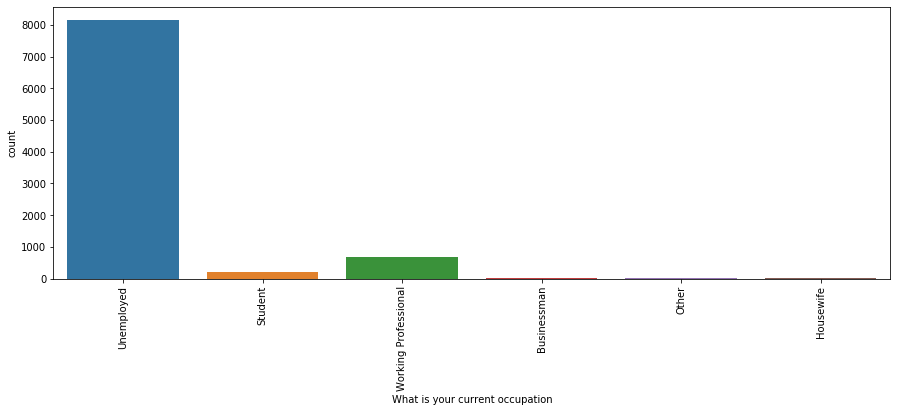

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(data['What is your current occupation'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

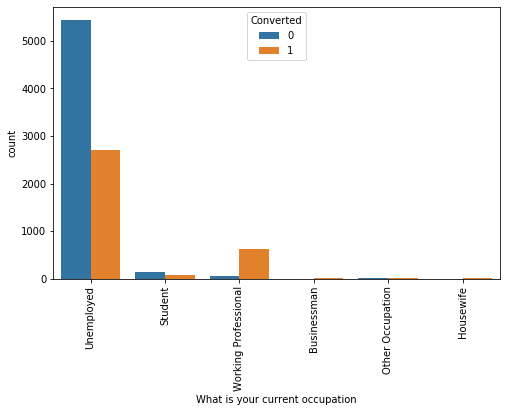

In [44]:
data['What is your current occupation'].replace('Other', 'Other Occupation', inplace=True)
plt.figure(figsize=(8,5))
sns.countplot(data['What is your current occupation'], hue=data.Converted, data=data)
plt.xticks(rotation=90)

We can ovserve that most of the Leads come from Unemployed but conversion rate is low. On the ther hand the number of Leads from Working Professionals are less but they are most likely to take up a course.

#### Lets analze the below columns together:
        1. Search
        2. Magazine
        3. Newspaper Article
        4. X Education Forums
        5. Newspaper
        6. Digital Advertisement
        7. Through Recommendations
        8. Receive More Updates About Our Courses 

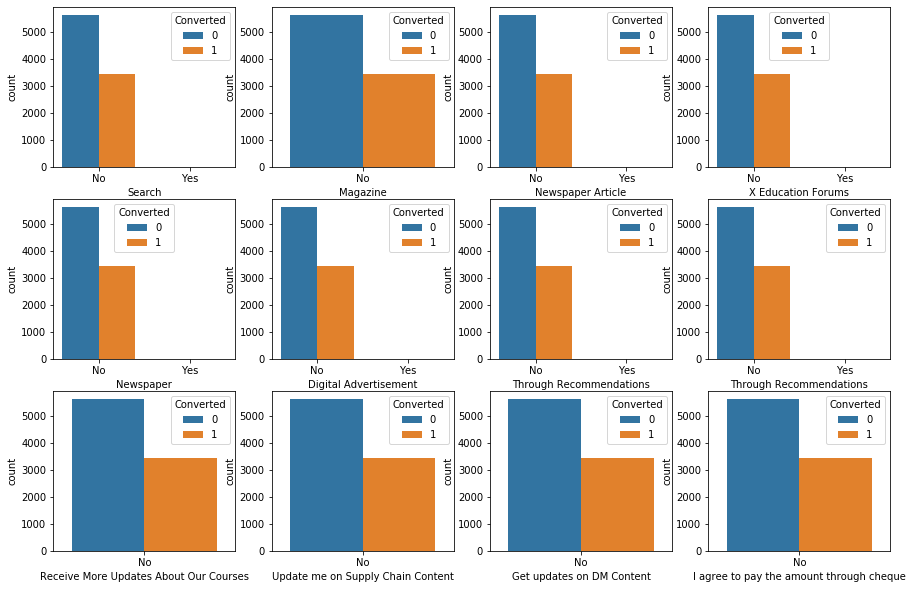

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.countplot(data.Search, hue=data.Converted, data=data)
plt.subplot(3,4,2)
sns.countplot(data.Magazine, hue=data.Converted, data=data)
plt.subplot(3,4,3)
sns.countplot(data['Newspaper Article'], hue=data.Converted, data=data)
plt.subplot(3,4,4)
sns.countplot(data['X Education Forums'], hue=data.Converted, data=data)
plt.subplot(3,4,5)
sns.countplot(data.Newspaper, hue=data.Converted, data=data)
plt.subplot(3,4,6)
sns.countplot(data['Digital Advertisement'], hue=data.Converted, data=data)
plt.subplot(3,4,7)
sns.countplot(data['Through Recommendations'], hue=data.Converted, data=data)
plt.subplot(3,4,8)
sns.countplot(data['Through Recommendations'], hue=data.Converted, data=data)
plt.subplot(3,4,9)
sns.countplot(data['Receive More Updates About Our Courses'], hue=data.Converted, data=data)
plt.subplot(3,4,10)
sns.countplot(data['Update me on Supply Chain Content'], hue=data.Converted, data=data)
plt.subplot(3,4,11)
sns.countplot(data['Get updates on DM Content'], hue=data.Converted, data=data)
plt.subplot(3,4,12)
sns.countplot(data['I agree to pay the amount through cheque'], hue=data.Converted, data=data)

#### A free copy of Mastering The Interview

(array([0, 1]), <a list of 2 Text xticklabel objects>)

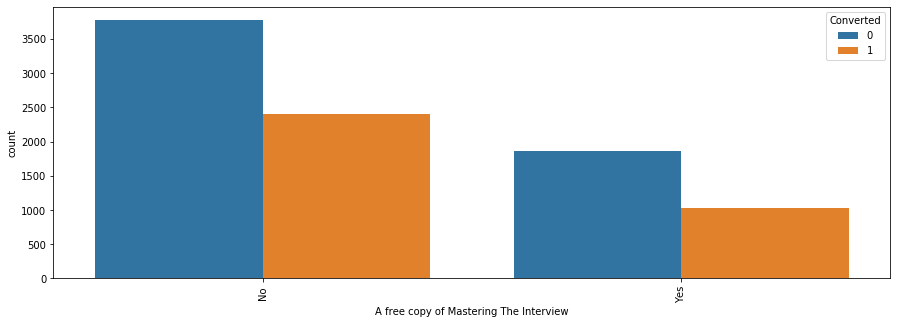

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(data['A free copy of Mastering The Interview'], hue=data.Converted, data=data)
plt.xticks(rotation=90)

#### Tags 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

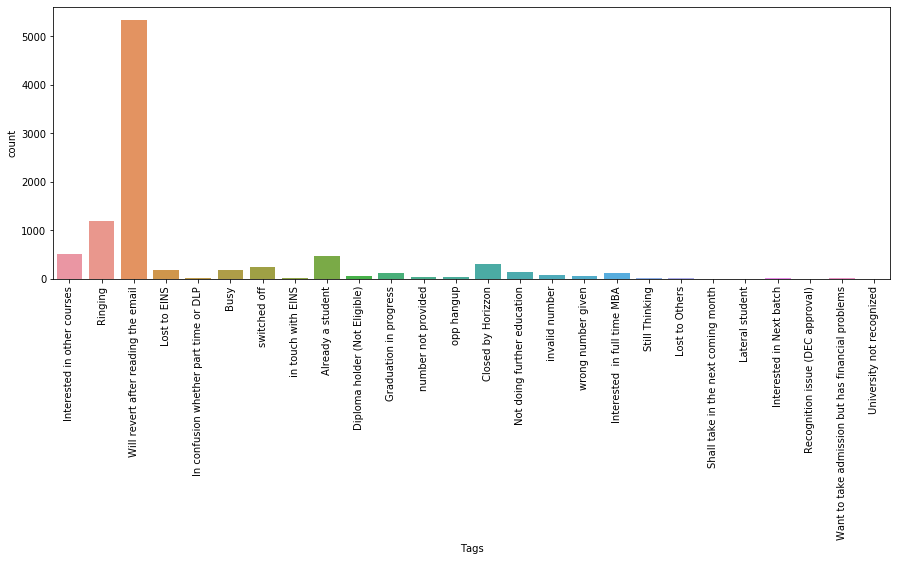

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(data.Tags)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

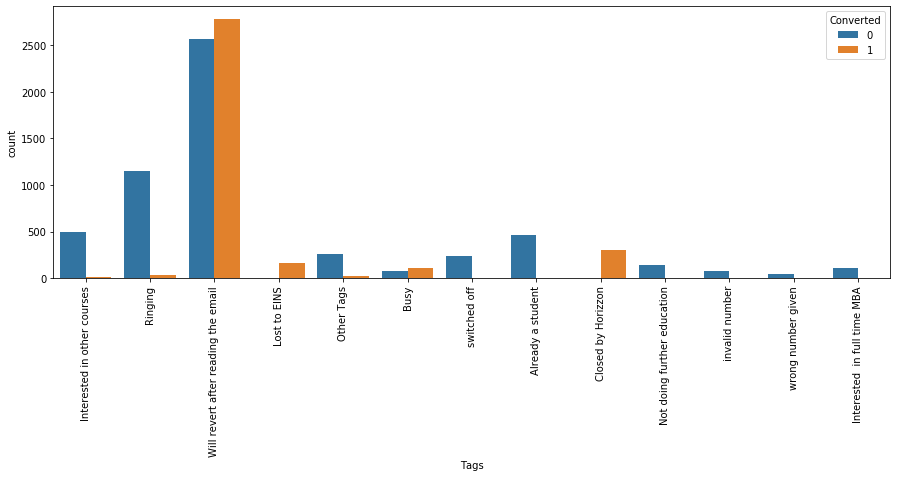

In [48]:
# Lets group all the categories with small in number into one
data.Tags.replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                   'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                   'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                   'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                   'University not recognized'], 'Other Tags', inplace=True)
plt.figure(figsize=(15,5))
sns.countplot(data.Tags, hue=data.Converted, data=data)
plt.xticks(rotation=90)

#### City

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

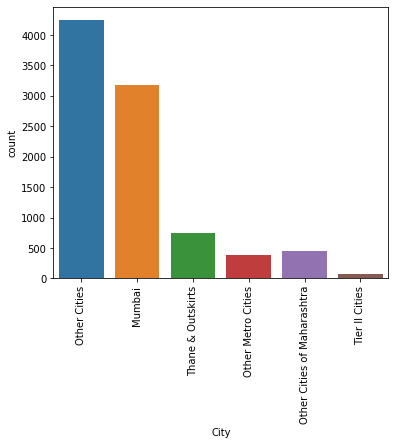

In [49]:
plt.figure(figsize=(6,5))
sns.countplot(data.City)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

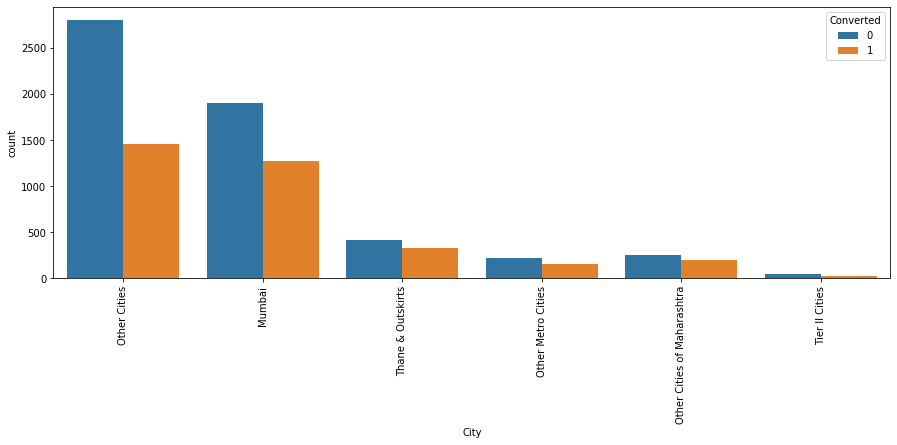

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data.City, hue=data.Converted, data=data)
plt.xticks(rotation=90)

We observe that most of the Leads are there from Mumbai and they have the most conversion rate as well.

### Based on the analysis above we can tell that it is best to drop many columns which are not adding much value. 

In [52]:
data.drop(['Lead Number', 'Country', 'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview'], axis=1, inplace=True)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Other Cities,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Other Cities,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Mumbai,Modified


### Data Preparation

In [53]:
# Converting Yes/No variables value to 1/0
data['Do Not Email'] = data['Do Not Email'].map({'Yes':1, 'No':0})
data['Do Not Call'] = data['Do Not Call'].map({'Yes':1, 'No':0})

In [54]:
# Use One-Hot Encoding for Categorical variables with drop_first=True
vars = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags', 'City',
        'Last Notable Activity']
dummies_data= pd.get_dummies(data[vars], drop_first=True)
data = pd.concat([data, dummies_data], axis=1)
data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'Tags', 'City',
           'Last Notable Activity'], axis=1, inplace=True)
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the data into Train & Test

In [55]:
from sklearn.model_selection import train_test_split

X = data.drop(['Prospect ID', 'Converted'], axis=1)
y = data.Converted

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100 )

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaling_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Building the model

In [57]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
np.random.seed(0)

In [59]:
def vifCalc(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [60]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1560.5
Date:                Mon, 20 Jul 2020   Deviance:                       3121.0
Time:                        20:08:26   Pearson chi2:                 1.24e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.1934   2.16e+05   9.35e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.6172      0.291     -5.566      0.000      -2.187      -1.048
Do Not Call                                             22.5053    1.4e+05      0.000      1.000   -2.74e+05    2.74e+05
TotalVisits                                              0.1259      0.077      1.645      0.100      -0.024       0.276
Total Time Spent on Website                              1.1757      0.057     20.718      0.000       1.064       1.287
Page Views Per Visit                                    -0.2412      0.084     -2.866      0.004      -0.406      -0.076
Lead Origin_Landing Page Submission                     -1.3312      0.192     -6.928      0.000      -1.708      -0.955
Lead Origin_Lead Add Form                                0.4941      1.257      0.393      0.694      -1.969       2.957
Lead Origin_Lead Import                                 28.2671   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.9953   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.1593      0.131      1.214      0.225      -0.098       0.416
Lead Source_Olark Chat                                   0.8063      0.210      3.840      0.000       0.395       1.218
Lead Source_Organic Search                               0.2805      0.180      1.562      0.118      -0.071       0.632
Lead Source_Others                                       0.4452      0.772      0.577      0.564      -1.067       1.957
Lead Source_Reference                                    2.2405      1.297      1.728      0.084      -0.301       4.782
Lead Source_Referral Sites                               0.0371      0.428      0.087      0.931      -0.802       0.877
Lead Source_Welingak Website                             4.3759      1.460      2.997      0.003       1.514       7.238
Last Activity_Email Bounced                             -0.8369      0.814     -1.028      0.304      -2.432       0.758
Last Activity_Email Link Clicked                         0.8670      0.556      1.558      0.119      -0.223       1.957
Last Activity_Email Opened                              -0.0092      0.332     -0.028      0.978      -0.659       0.641
Last Activity_Form Submitted on Website                  0.0287      0.525      0.055      0.956      -1.001       1.058
Last Activity_Olark Chat Conversation                   -0.5319      0.342     -1.554      0.120      -1.203       0.139
Last Activity_Other Activity                             1

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
    rfe.support_

array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 48),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 42),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 59),
 ('Lead Source_Reference', False, 17),
 ('Lead Source_Referral Sites', False, 65),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 25),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Form Submitted on Website', False, 39),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 47),
 ('Last Activity_SMS Sent', 

In [64]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Other Activity', 'Last Activity_Unsubscribed',
       'Specialization_Other Specialization',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1959.8
Date:                Mon, 20 Jul 2020   Deviance:                       3919.6
Time:                        20:08:30   Pearson chi2:                 1.07e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7077      0.248     -2.854      0.004      -1.194      -0.222
Do Not Email                                  -1.8104      0.207     -8.731      0.000      -2.217      -1.404
Lead Origin_Landing Page Submission           -1.4369      0.148     -9.680      0.000      -1.728      -1.146
Lead Origin_Lead Add Form                      1.7601      0.323      5.446      0.000       1.127       2.394
Lead Source_Welingak Website                   2.6159      0.810      3.230      0.001       1.029       4.203
Last Activity_Other Activity                   1.9828      0.564      3.518      0.000       0.878       3.087
Last Activity_Unsubscribed                     2.6177      0.549      4.770      0.000       1.542       3.693
Specialization_Other Specialization           -2.1260      0.151    -14.059      0.000      -2.422      -1.830
What is your current occupation_Unemployed    -2.3636      0.192    -12.292      0.000      -2.740      -1.987
Tags_Busy                                      3.2170      0.296     10.858      0.000       2.636       3.798
Tags_Closed by Horizzon                        8.5791      0.741     11.579      0.000       7.127      10.031
Tags_Lost to EINS                              8.5681      0.744     11.524      0.000       7.111      10.025
Tags_Ringing                                  -0.9732      0.305     -3.192      0.001      -1.571      -0.376
Tags_Will revert after reading the email       3.9654      0.192     20.618      0.000       3.588       4.342
Tags_invalid number                          -21.4292   1.46e+04     -0.001      0.999   -2.87e+04    2.87e+04
Last Notable Activity_SMS Sent                 2.8598      0.113     25.231      0.000       2.638       3.082
==============================================================================================================
"""

In [66]:
col1 = col.drop('Tags_invalid number',1)

In [67]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.9
Date:                Mon, 20 Jul 2020   Deviance:                       3925.7
Time:                        20:08:30   Pearson chi2:                 1.11e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7628      0.250     -3.049      0.002      -1.253      -0.272
Do Not Email                                  -1.8075      0.207     -8.722      0.000      -2.214      -1.401
Lead Origin_Landing Page Submission           -1.4476      0.149     -9.726      0.000      -1.739      -1.156
Lead Origin_Lead Add Form                      1.7683      0.324      5.457      0.000       1.133       2.403
Lead Source_Welingak Website                   2.6052      0.810      3.216      0.001       1.018       4.193
Last Activity_Other Activity                   1.9934      0.567      3.514      0.000       0.882       3.105
Last Activity_Unsubscribed                     2.6094      0.548      4.764      0.000       1.536       3.683
Specialization_Other Specialization           -2.1321      0.152    -14.062      0.000      -2.429      -1.835
What is your current occupation_Unemployed    -2.3927      0.194    -12.334      0.000      -2.773      -2.012
Tags_Busy                                      3.3183      0.295     11.261      0.000       2.741       3.896
Tags_Closed by Horizzon                        8.6709      0.741     11.705      0.000       7.219      10.123
Tags_Lost to EINS                              8.6608      0.743     11.651      0.000       7.204      10.118
Tags_Ringing                                  -0.8679      0.303     -2.864      0.004      -1.462      -0.274
Tags_Will revert after reading the email       4.0586      0.191     21.196      0.000       3.683       4.434
Last Notable Activity_SMS Sent                 2.8441      0.113     25.234      0.000       2.623       3.065
==============================================================================================================
"""

In [68]:
vif = vifCalc(X_train_sm)
vif

,Features,VIF
0,const,21.99
2,Lead Origin_Landing Page Submission,2.98
7,Specialization_Other Specialization,2.81
3,Lead Origin_Lead Add Form,1.76
13,Tags_Will revert after reading the email,1.65
12,Tags_Ringing,1.47
4,Lead Source_Welingak Website,1.38
10,Tags_Closed by Horizzon,1.25
8,What is your current occupation_Unemployed,1.12
14,Last Notable Activity_SMS Sent,1.12


In [69]:
# Prediction on the Train Dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.367140,3009,0
1,0,0.109936,1012,0
2,0,0.002117,9226,0
3,1,0.908845,4750,1
4,1,0.983004,7987,1


In [70]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy as well
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3737  168]
 [ 641 1805]]
0.872618485277909


In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.367140,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.109936,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.002117,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.908845,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.983004,7987,1,1,1,1,1,1,1,1,1,1,1


In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.721934  0.975879  0.562868
0.2   0.2  0.735790  0.974244  0.586428
0.3   0.3  0.835144  0.883892  0.804609
0.4   0.4  0.873091  0.742437  0.954930
0.5   0.5  0.872618  0.737939  0.956978
0.6   0.6  0.872618  0.733442  0.959795
0.7   0.7  0.871359  0.726492  0.962100
0.8   0.8  0.860337  0.679068  0.973880
0.9   0.9  0.805857  0.522077  0.983611


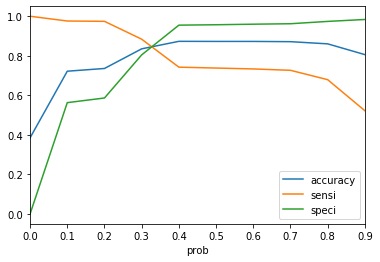

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [74]:
#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.367140,3009,0,1,1,1,1,0,0,0,0,0,0,1,37
1,0,0.109936,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.002117,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.908845,4750,1,1,1,1,1,1,1,1,1,1,1,1,91
4,1,0.983004,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [75]:
#Calculating the accuracy score
acc_score = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(acc_score)
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

0.8370335380255078
[[3154  751]
 [ 284 2162]]


In [76]:
#Calculating the Sensitivity and Specificity
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))

Sensitivity:  0.883892068683565
Specificity:  0.8076824583866837


In [93]:
#Calculating Precision and Recall
print("Precision: ", confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))
print("Recall: ", confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Precision:  0.7114261884904087
Recall:  0.8624873609706775


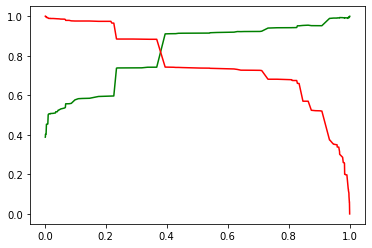

In [78]:
#Plotting the Precision - Recall Curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predictions on Test

In [79]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Other Activity,Last Activity_Unsubscribed,Specialization_Other Specialization,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1490,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,0,0,0,0,1,1,0,0,0,0,1,0
4216,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3830,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [81]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.226366
1,1,1490,0.863918
2,0,7936,0.226366
3,1,4216,0.999937
4,0,3830,0.367140


In [82]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.226366
1,1490,1,0.863918
2,7936,0,0.226366
3,4216,1,0.999937
4,3830,0,0.367140


In [83]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.226366,0
1,1490,1,0.863918,1
2,7936,0,0.226366,0
3,4216,1,0.999937,1
4,3830,0,0.367140,1


In [90]:
#Calculate the Score value
y_pred_final['Score'] = y_pred_final.Converted_prob.map(lambda x: x*100 )
y_pred_final['Score'] = y_pred_final['Score'].astype('int32')
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Score
0,3271,0,0.226366,0,22
1,1490,1,0.863918,1,86
2,7936,0,0.226366,0,22
3,4216,1,0.999937,1,99
4,3830,0,0.367140,1,36


In [84]:
#Calculating the Accuracy on Test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8229893499816379

In [85]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
#Calculating the Sensitivity and Specificity on Test data
print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))

Sensitivity:  0.8624873609706775
Specificity:  0.8004613610149942


In [94]:
#Calculating Precision and Recall
print("Precision: ", confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))
print("Recall: ", confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Precision:  0.7114261884904087
Recall:  0.8624873609706775


In [95]:
y_pred_final.shape

(2723, 5)

In [98]:
#Conversion Rate of Test data
100*(sum(y_pred_final.final_predicted)/len(y_pred_final))

44.032317297098786